<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 7: *Imbalanced Classification & NN***

###**Tenggat Waktu: Selasa, 03 Desember 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: Selasa, 03 Desember 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa yang mengerjakan lab menggunakan chatgpt tidak akan dinilai dan otomatis mendapat nilai 0



In [61]:
# Isi dengan data diri Anda
NAMA = "Alden Luthfi"
KELAS = "A"
NPM = "2206028932"
USERNAME_KAGGLE = "aldenluthfi"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [62]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alden Luthfi dari kelas A dengan NPM 2206028932, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alden Luthfi)


# Import Library

In [63]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from sklearn import clone
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


# Functions

In [64]:
def plot_datasets_for_comparison(X1, y1, title1, X2, y2, title2, figsize=(16, 6)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    axes[0].scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], label='Class 0 (Majority)')
    axes[0].scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], label='Class 1 (Minority)')
    axes[0].set_title(title1, fontsize=14)
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].legend()

    axes[1].scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], label='Class 0 (Majority)')
    axes[1].scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], label='Class 1 (Minority)')
    axes[1].set_title(title2, fontsize=14)
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].legend()

    x_min = min(X1[:, 0].min(), X2[:, 0].min())
    x_max = max(X1[:, 0].max(), X2[:, 0].max())
    y_min = min(X1[:, 1].min(), X2[:, 1].min())
    y_max = max(X1[:, 1].max(), X2[:, 1].max())

    axes[0].set_xlim(x_min, x_max)
    axes[0].set_ylim(y_min, y_max)
    axes[1].set_xlim(x_min, x_max)
    axes[1].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

def plot_single_dataset(X, y, title, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0 (Majority)')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1 (Minority)')
    plt.title(title, fontsize=14)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Imbalanced Classification

Imbalanced classification merupakan suatu masalah dari klasifikasi ketika dataset training memiliki distribusi kelas yang tidak seimbang. Ini artinya jumlah contoh dalam satu atau beberapa kelas jauh lebih sedikit dibandingkan kelas lainnya. Masalah ini harus diidentifikasi sebelum melakukan training pada suatu model karena algoritma-algoritma dalam machine learning bekerja berdasarkan asumsi bahwa dataset yang digunakan memiliki jumlah samkple yang sama. Jika algoritma tersebut dipakai pada masalah classification dengan ciri-ciri imbalanced, maka hasil classification tersebut kemungkinan besar menjadi sangat buruk karena model cenderung bias ke kelas mayoritas. Padahal pada berbagai kasus, kelas minoritas tersebut bisa dikatakan lebih penting daripada kelas mayoritas.

Misalnya, pada kasus diagnosis penyakit, biasanya jumlah orang sehat jauh lebih banyak dibandingkan orang yang sakit. Sebagai contoh, dari 100 orang, hanya 5 orang yang terdiagnosis sakit. Jika model tidak dirancang untuk menangani dataset yang imabalance, model cenderung memprediksi orang sakit sebagai sehat. Hal ini disebabkan oleh kurangnya informasi atau pola yang dapat dipelajari oleh model dari kelas minoritas (orang sakit). Tentunya, mengklasifikasikan orang sakit sebagai sehat adalah kesalahan yang dapat berdampak fatal bagi orang yang benar-benar sakit/membutuhkan perawatan. Oleh karena itu penanganan dataset yang imbalance pada suatu masalah classification sangat penting untuk dilakukan.

Tingkat ketidakseimbangan kelas dapat bervariasi:
1. **Slight Imbalance**, misalnya rasio 4:6, biasanya dapat ditangani seperti masalah klasifikasi biasa karena rasio cenderung balance.
2. **Severe Imbalance**, seperti rasio 1:100 atau lebih, membutuhkan pendekatan/teknik khusus agar model dapat mendeteksi kelas minoritas dengan benar

Agar kita memiliki gambaran mengenai Imbalanced Classification ini, perhatikan kode berikut:

### Slightly Imbalanced

In [65]:
# Membuat dataset slightly imbalanced
X_slight, y_slight = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.6, 0.4],
    flip_y=0,
    random_state=17
)

# Hitung jumlah sampel pada masing-masing kelas
Counter(y_slight)

Counter({0: 6000, 1: 4000})

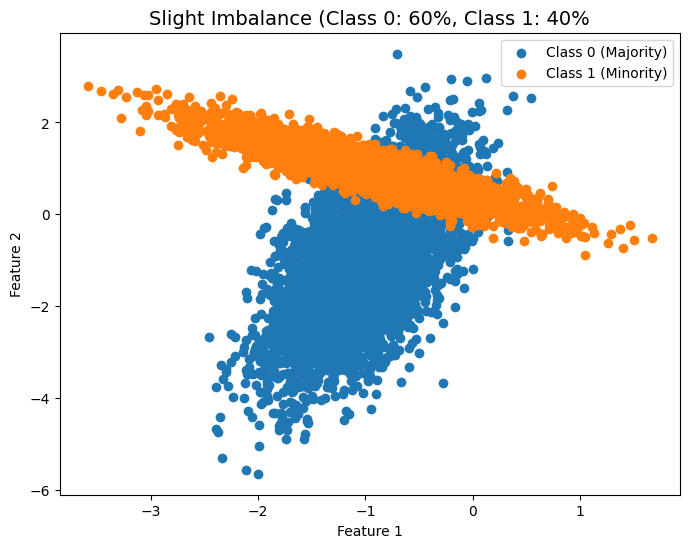

In [66]:
plot_single_dataset(X_slight, y_slight, "Slight Imbalance (Class 0: 60%, Class 1: 40%")

### Severely Imbalanced

In [67]:
# Membuat dataset severely imbalanced
X_severe, y_severe = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99, 0.01],
    flip_y=0,
    random_state=17
)

# Hitung jumlah sampel pada masing-masing kelas
Counter(y_severe)

Counter({0: 9900, 1: 100})

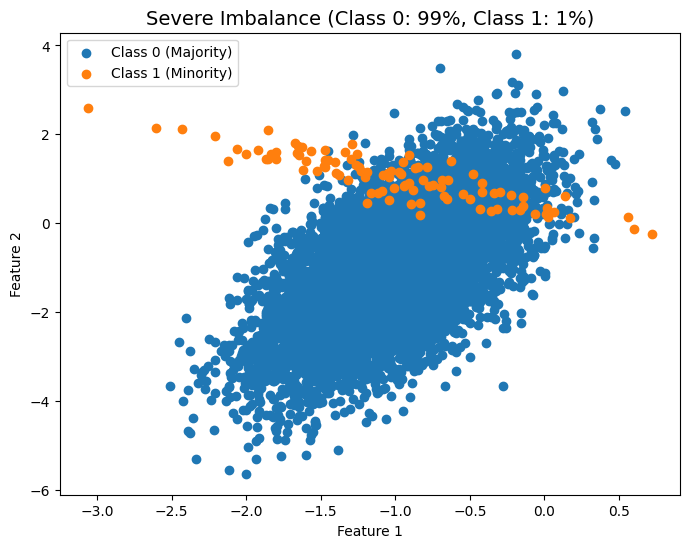

In [68]:
plot_single_dataset(X_severe, y_severe, "Severe Imbalance (Class 0: 99%, Class 1: 1%)", figsize=(8, 6))

Terlihat jelas perbedaan jumlah kelas minoritas antara dataset slightly imbalanced dengan severely imbalanced. Jumlah kelas minoritas yang sedikit ini nantinya akan berpengaruh buruk pada kinerja model dalam mengklasifikasi kelas minoritas. Agar lebih paham, mari kita simak evaluasi model DecisionTreeClassifier dengan menggunakan dataset yang slightly imbalanced dan juga severely imbalanced

### Evaluasi dengan slightly imbalanced dataset

In [69]:
model = DecisionTreeClassifier(random_state=42)

# Cross-validation menggunakan StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model, X_slight, y_slight, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.8976
f1_macro score: 0.893269565304416
precision_macro score: 0.8935589554441663
recall_macro score: 0.8930416666666666


Skor F1 dan skor lainnya lumayan tinggi, bisa dikatakan bahwa model DecisionTreeClassifier sudah bisa memprediksi kelas minoritas dan mayoritas dengan baik.

### Evaluasi dengan severely imbalanced dataset

In [70]:
model = DecisionTreeClassifier(random_state=42)

# Cross-validation menggunakan StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9879
f1_macro score: 0.6933756229197872
precision_macro score: 0.6999315145422763
recall_macro score: 0.691969696969697


Terlihat bahwa akurasi DecisionTree pada kedua dataset lumayan tinggi. Tetapi perlu diingat bahwa metrik akurasi dipengaruhi oleh semua prediksi yang benar (True negatives) dan (True positives). Pada slightly imbalanced dataset, skor akurasi dan metrik lainnya tidak menunjukkan perbedaan yang signifikan. Hal ini terjadi karena model dapat memanfaatkan informasi yang cukup dari kedua kelas, meskipun distribusinya tidak sepenuhnya seimbang. Namun, pada severely imbalanced dataset, skor recall, precision, dan F1 jauh lebih rendah dibandingkan skor akurasi. Ini menunjukkan bahwa meskipun model terlihat bagus dari sisi akurasi, kemampuannya untuk memprediksi kelas minoritas masih kurang. Dari sini, bisa dikatakan bahwa akurasi bukanlah metrik yang dapat diandalkan untuk menilai performa model pada dataset yang severely imbalanced (dengan asumsi positive class adalah class minoritas). Dominasi kelas mayoritas cenderung memengaruhi hasil model, sehingga informasi dari kelas minoritas sering terabaikan.

Untuk menangani kasus severe imbalance, kita bisa menerapkan teknik data sampling. Data sampling adalah teknik yang digunakan untuk membuat distribusi kelas menjadi lebih balance. Contohnya adalah dengan **Oversampling** (menambah jumlah data kelas minoritas) dan **Undersampling** (mengurangi jumlah data kelas mayoritas). Perlu diperhatikan juga bahwa data sampling hanya diterapkan pada training set dan tidak dilakukan pada validation atau test set karena kita ingin model untuk mempelajari pola data dengan baik pada kelas minoritas, yang kemudian hasil evaluasi model tersebut dapat mencerminkan performa model pada data di dunia nyata yang tetap tidak seimbang.

## Oversampling

**Oversampling** adalah teknik yang digunakan untuk **menambah jumlah data dari kelas minoritas** dalam sebuah dataset. Tujuannya adalah untuk menyeimbangkan distribusi kelas pada dataset. Terdapat 2 tipe utama dalam metode oversampling berdasarkan cara penambahan data, yaitu:
1.  **Penduplikasian Data**: Menambah sampel dengan menduplikasi data yang sudah ada dari kelas minoritas. Contohnya adalah **Random Oversampling**
2. **Pembuatan Data Sintetik**: Menambah sampel dengan membuat data baru yang mirip dengan data asli dari kelas minoritas. Contohnya antara lain:
    - Synthetic Minority Oversampling Technique (SMOTE),
    - Borderline-SMOTE,
    - Borderline Oversampling with SVM, dan
    - Adaptive Synthetic Sampling (ADASYN).

Selanjutnya kita akan membahas masing-masing contoh oversampling diatas beserta cara mengimplementasikannya dalam kode.

### Random Oversampling

Random Oversampling adalah teknik untuk mengatasi imbalanced dataset dengan cara menambah jumlah data di kelas minoritas melalui duplikasi data yang ada secara random. Proses duplikasi data ini tidak akan menambah informasi baru.

In [71]:
# Definisi random undersampling class
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Resampling
X_rand_over, y_rand_over = rand_over.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

Counter({0: 9900, 1: 9900})


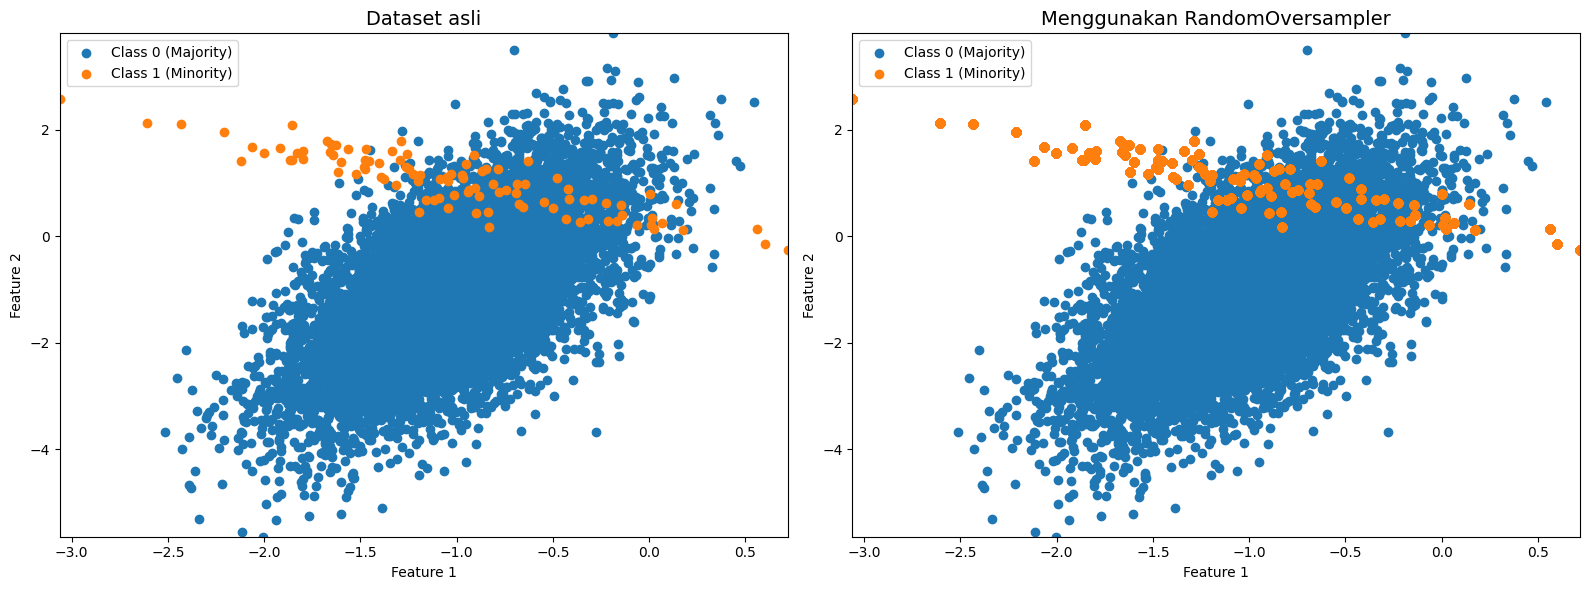

In [72]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset asli", X_rand_over, y_rand_over, "Menggunakan RandomOversampler")

Memang kelihatan tidak ada perbedaan antara dataset asli dan yang menggunakan RandomOversampler. Hal ini karena RandomOversampler bekerja dengan menduplikasi data atau titik-titik yang sudah ada pada dataset asli, sehingga titik yang baru akan tertumpuk pada titik yang sama pada dataset asli.

Perlu diingat bahwa ketika kita mencoba membuat distribusi kelas menjadi sepenuhnya seimbang pada dataset yang sangat tidak seimbang, itu dapat menyebabkan overfitting pada kelas minoritas. Mengapa? Karena data minoritas diperbanyak melalui duplikasi, model dapat mengingat (memorize) pola dari kelas minoritas secara berlebihan tanpa benar-benar mempelajari hubungan yang relevan dengan data mayoritas. Hal ini dapat membuat model memiliki performa yang sangat baik pada training dataset, tetapi gagal untuk generalize pada data baru (test dataset). Oleh karena itu, kita perlu mengetahui apakah metode ini cocok untuk digunakan atau tidak dengan membandingkan kinerja model dengan dan tanpa oversampling.

### Synthetic Minority Oversampling Technique (SMOTE)

Berbeda dengan RandomOversampling yang bekerja dengan cara menduplikasi data yang sudah ada, SMOTE bekerja dengan cara membuat data sintetik baru dengan memanfaatkan interpolasi antara data dari kelas minoritas yang sudah ada. Prosedurnya adalah sebagai berikut:
1. SMOTE memilih satu instance dari kelas minoritas secara acak dan mencari k nearest minority class neighbors nya
2. Pilih salah satu neighbor secara acak
3. Data baru yang dihasilkan akan terletak pada garis yang menghubungkan instance dan neighbornya

![SMOTE](https://i.ibb.co/MV143tn/Screenshot-2024-04-23-132339.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.37*

In [73]:
# Definisi SMOTE class
smote = SMOTE()

# Resampling
X_smote, y_smote = smote.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({0: 9900, 1: 9900})


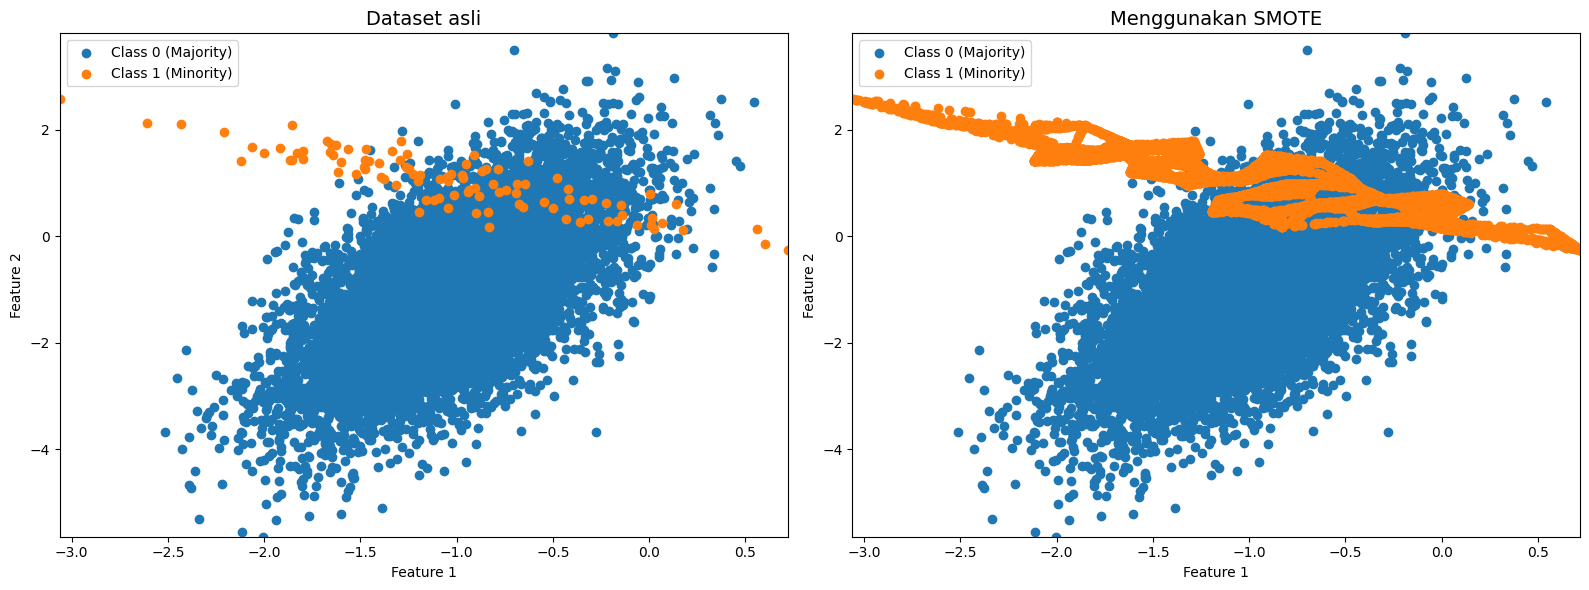

In [74]:
# Perbandingan scatter plot antara dataset asli dan dataset sampling
plot_datasets_for_comparison(X_severe, y_severe, "Dataset asli", X_smote, y_smote, "Menggunakan SMOTE")

### Borderline-SMOTE

merupakan pengembangan dari SMOTE yang menggunakan algoritma seperti k-nearest neighbor untuk mengidentifikasi sampel kelas minoritas yang biasanya salah diklasifikasikan. Data sintetik akan dibuat di sekitar area sampel tersebut agar dapat membantu model fokus pada area yang sulit diklasifikan.

In [75]:
# Definisi Borderline SMOTE class
borderline_smote = BorderlineSMOTE()

# Resampling
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({0: 9900, 1: 9900})


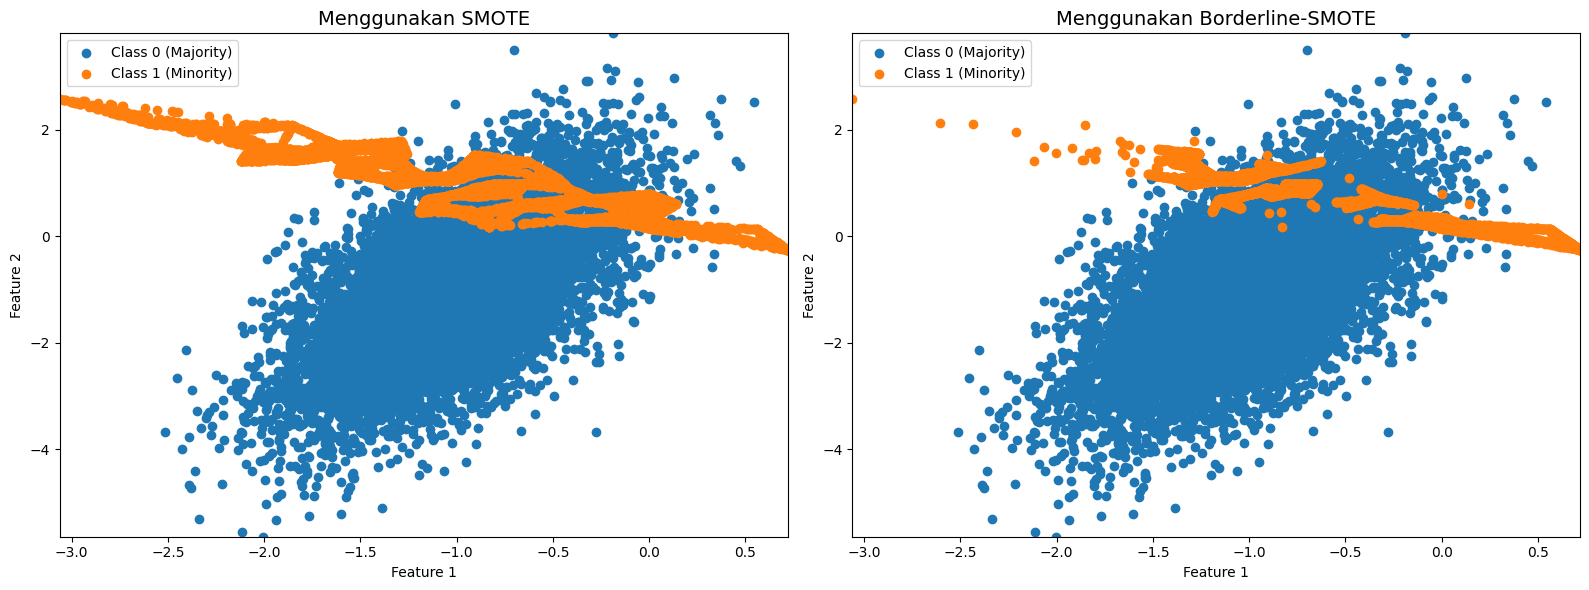

In [76]:
plot_datasets_for_comparison(X_smote, y_smote, "Menggunakan SMOTE", X_borderline_smote, y_borderline_smote, "Menggunakan Borderline-SMOTE")

### Borderline Oversampling with SVM

Versi Borderline-SMOTE yang menggunakan SVM sebagai pengganti KNN untuk mengidentifikasi sampel kelas minoritas yang biasanya salah diklasifikasikan.

In [77]:
# Definisi Borderline SMOTE dengan SVM class
svm_smote = SVMSMOTE()

# Resampling
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

Counter({0: 9900, 1: 9900})


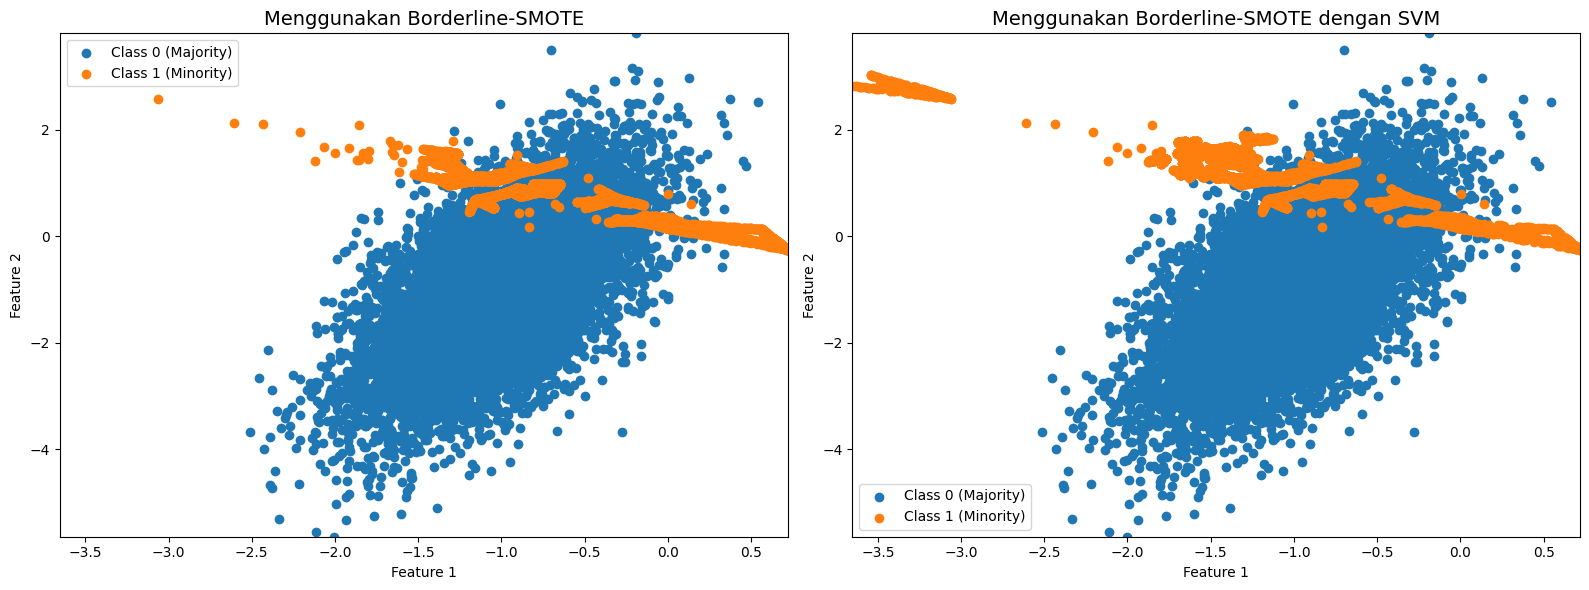

In [78]:
plot_datasets_for_comparison(X_borderline_smote, y_borderline_smote, "Menggunakan Borderline-SMOTE", X_svm_smote, y_svm_smote, "Menggunakan Borderline-SMOTE dengan SVM")

### Adaptive Synthetic Sampling (ADASYN)

menyesuaikan jumlah data sintetis yang dihasilkan berdasarkan sulit atau tidaknya memprediksi sampel dari kelas minoritas berdasarkan distribusi datanya. Sampel dari kelas minoritas yang lebih sulit diprediksi mendapatkan lebih banyak data sintetis, sedangkan sampel yang lebih mudah diprediksi mendapatkan lebih sedikit data sintetis.

In [79]:
# Definisi ADASYN class
adasyn = ADASYN()

# Resampling
X_adasyn, y_adasyn = adasyn.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

Counter({0: 9900, 1: 9898})


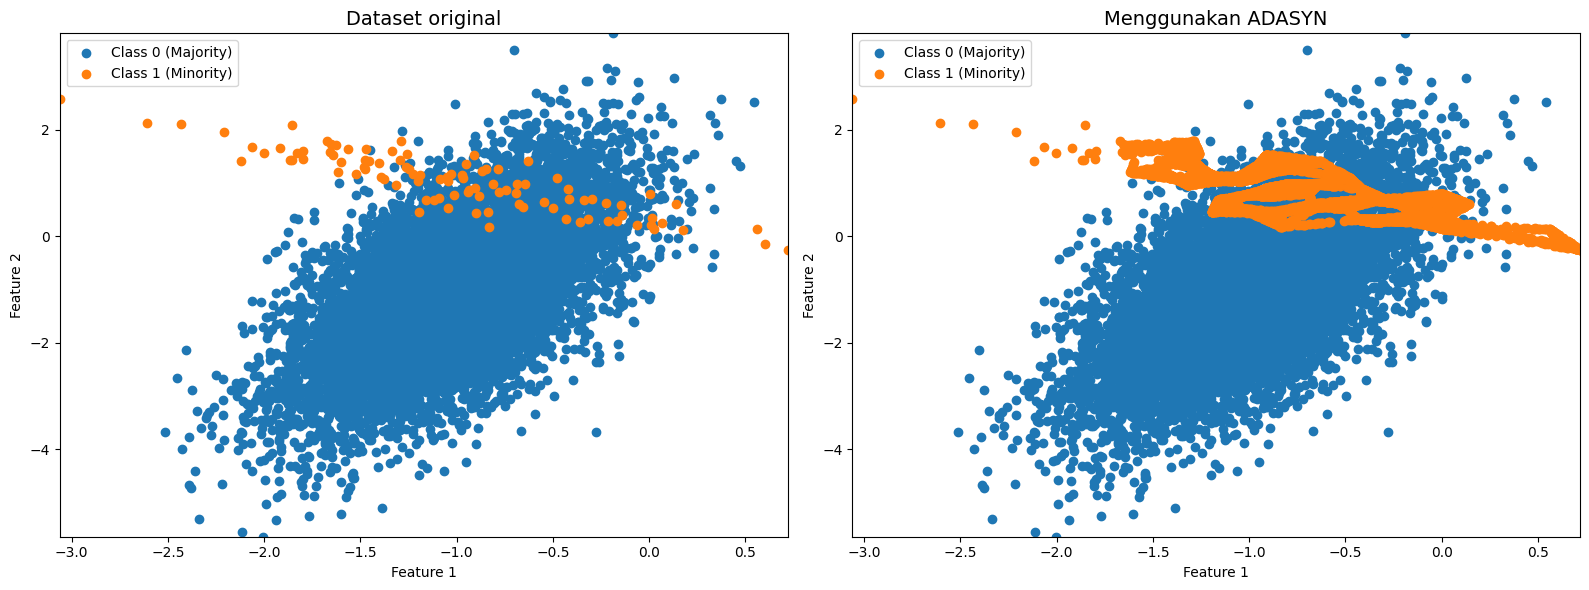

In [80]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_adasyn, y_adasyn, "Menggunakan ADASYN")

## Undersampling

**Undersampling** adalah teknik yang digunakan untuk **mengurangi jumlah data dari kelas mayoritas** dalam sebuah dataset. Tujuannya sama dengan oversampling, yaitu untuk meyeimbangkan distribusi kelas pada dataset. Misalnya mengurangi rasio antara kelas minoritas dengan kelas mayoritas dari 1:99 menjadi 1:10, 1:1, dsb. Terdapat beberapa metode undersampling yang ada, antara lain:
- Random Undersampling,
- Near Miss Undersampling, dan
- Tomek Link Undersampling.

Selanjutnya kita akan membahas masing-masing contoh undersampling diatas beserta cara mengimplementasikannya dalam kode.

### Random Undersampling

memilih sampel acak dari kelas mayoritas dan kemudian menghapusnya dari dataset.

In [81]:
# Definisi RandomUnderSampler class
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Resampling
X_rand_under, y_rand_under = rand_under.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

Counter({0: 100, 1: 100})


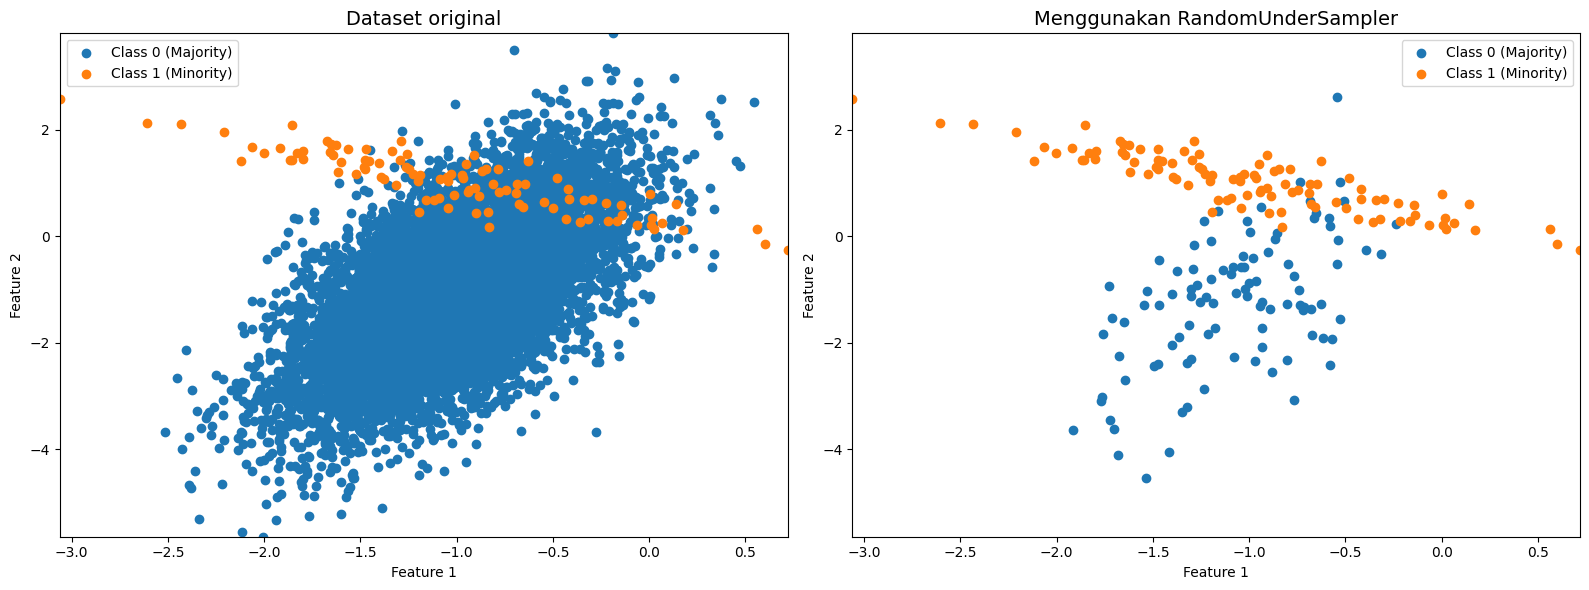

In [82]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_rand_under, y_rand_under, "Menggunakan RandomUnderSampler")

### Near Miss Undersampling

Near Miss Undersampling adalah salah satu metode undersampling yang memilih sample berdasarkan jarak antara samples di kelas mayoritas dengan samples di kelas minoritas. Ada beberapa varians dari Near Miss Undersampling ini, yaitu NearMiss-1, NearMiss-2, dan NearMiss-3.

#### NearMiss-1

Memilih sample dari kelas mayoritas yang memiliki jarak rata-rata terkecil terhadap tiga sample terdekat dari kelas minoritas.

In [83]:
# Definisi Near Miss 1 class
nearmiss = NearMiss()

# Resampling
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

Counter({0: 100, 1: 100})


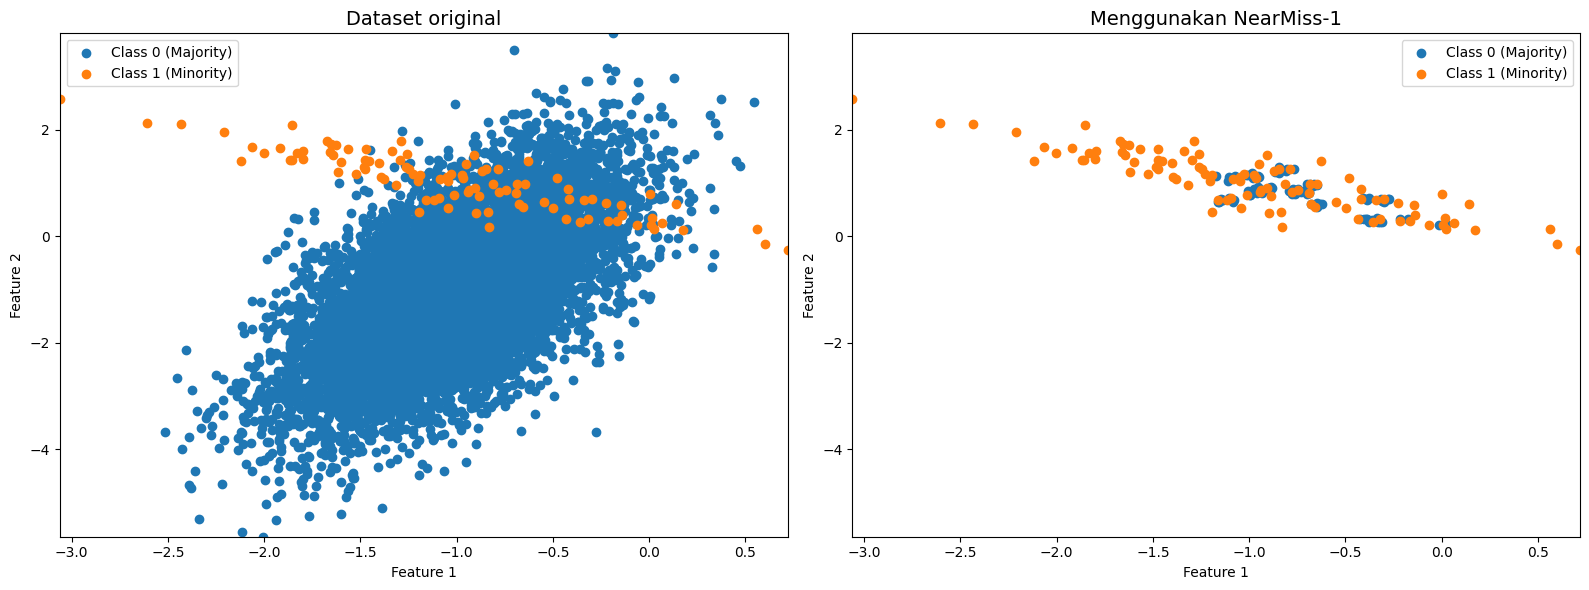

In [84]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_nearmiss, y_nearmiss, "Menggunakan NearMiss-1")

#### NearMiss-2

Memilih sample dari kelas mayoritas yang memiliki jarak rata-rata terkecil terhadap tiga sample terjauh dari kelas minoritas.

In [85]:
# Definisi Near Miss 2 class
nearmiss2 = NearMiss(version=2)

# Resampling berdasarkan dataset simulasi
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

Counter({0: 100, 1: 100})


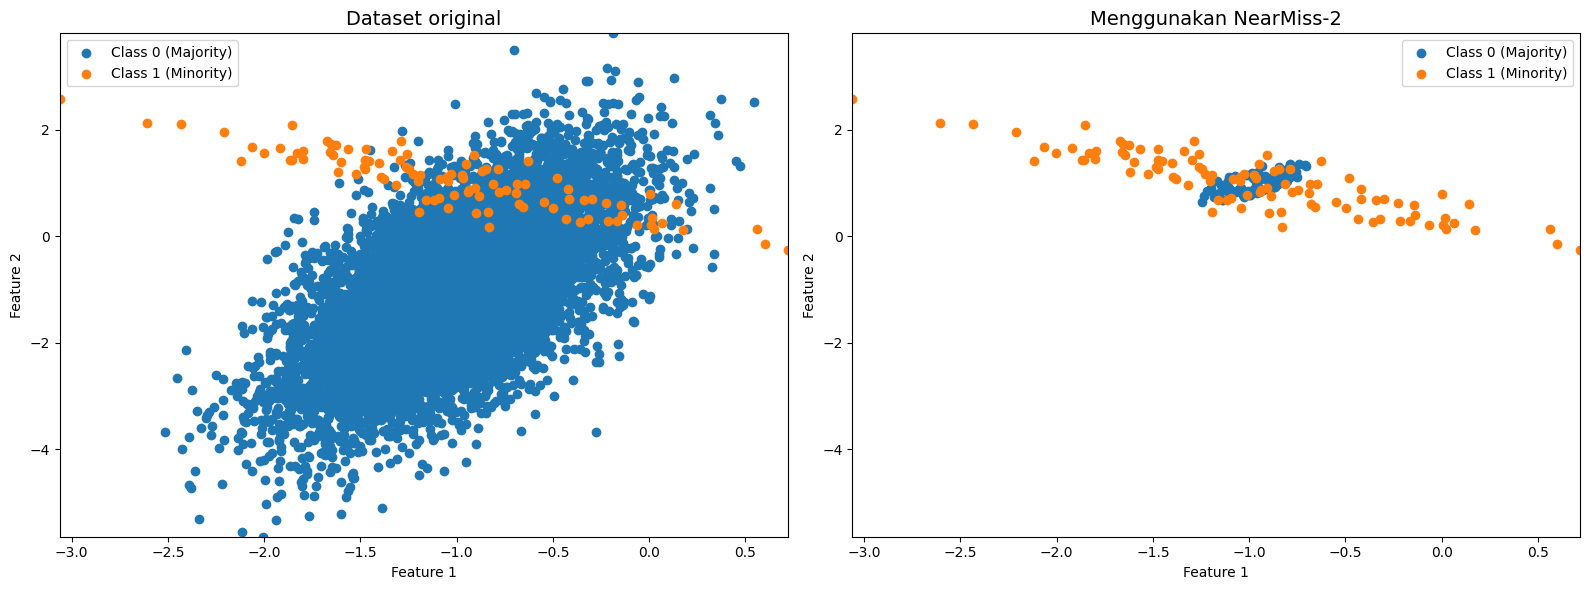

In [86]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_nearmiss2, y_nearmiss2, "Menggunakan NearMiss-2")

#### NearMiss-3

Memilih sample dari kelas mayoritas yang memiliki jarak terkecil ke setiap sample dari kelas minoritas.

In [87]:
# Definisi Near Miss 3 class
nearmiss3 = NearMiss(version=3)

# Resampling
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

Counter({0: 100, 1: 100})


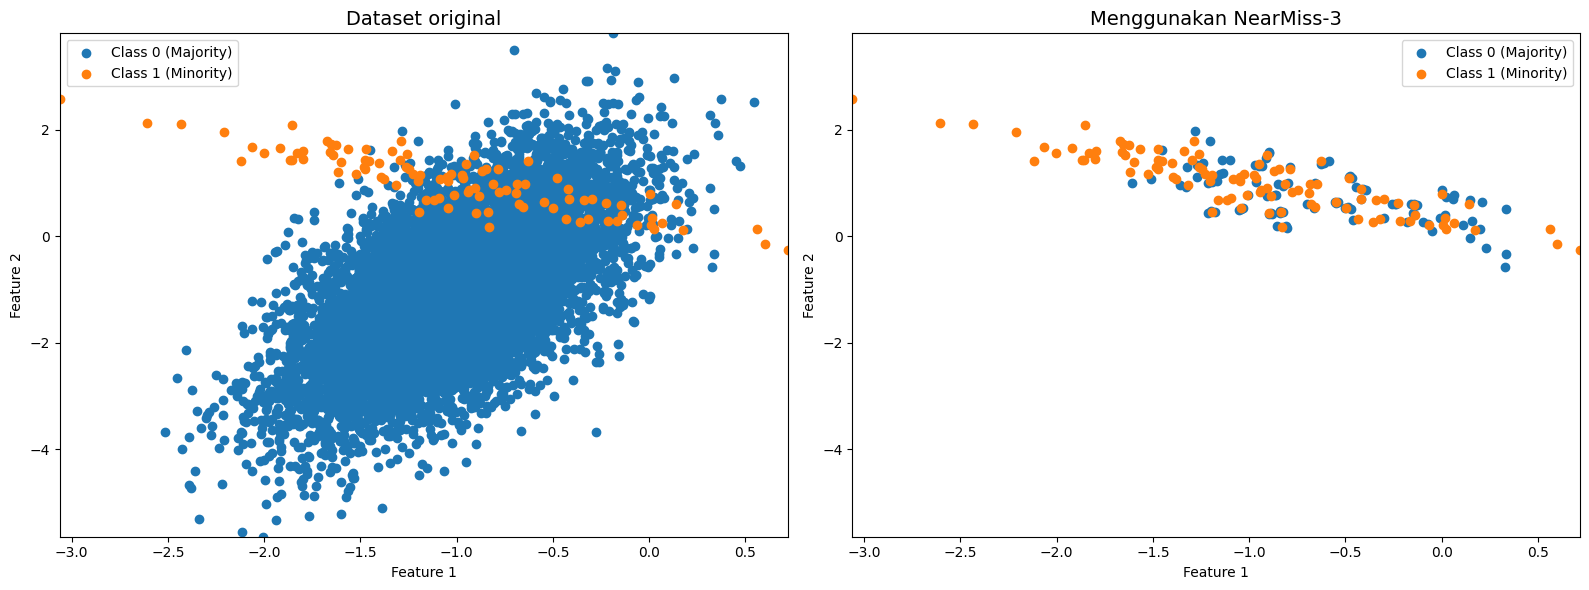

In [88]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_nearmiss3, y_nearmiss3, "Menggunakan NearMiss-3")

### Tomek Link Undersampling

Tomek Link Undersampling bekerja dengan cara mengidentifikasi dan menghapus sample dari kelas mayoritas yang merupakan Tomek Link. Tomek Link didefinisikan untuk pasangan sampel *a* dan *b* jika memenuhi kondisi berikut:
1. Tetangga terdekat *a* adalah *b*,
2. Tetangga terdekat *b* adalah *a*, dan
3. *a* dan *b* berasal dari kelas yang berbeda.

Artinya, *a* dan *b* adalah tetangga terdekat satu sama lain, tetapi berada pada kelas yang berbeda.

In [89]:
# Definisi Tomek Link class
tomek = TomekLinks()

# Resampling
X_tomek, y_tomek = tomek.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

Counter({0: 9862, 1: 100})


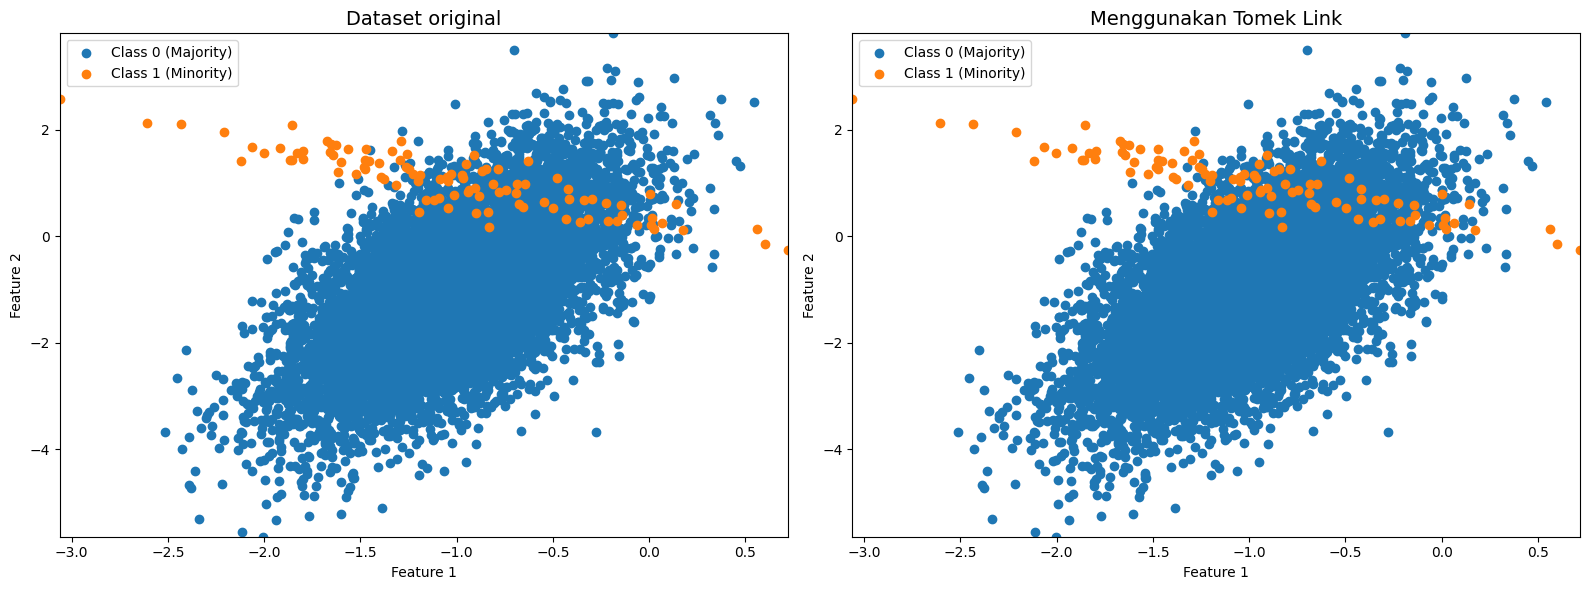

In [90]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_tomek, y_tomek, "Menggunakan Tomek Link")

Terlihat bahwa tidak ada perbedaan yang signifikan antara dataset original dengan dataset yang menggunakan Tomek Link Undersampling. Hal ini dikarenakan jumlah tomek links yang ditemukan sangat sedikit.

## Cost Sensitive Learning

Dalam dunia nyata, klasifikasi sering kali memiliki consequence yang berbeda-beda. Ambil contoh Bank loan problem dimana bank ingin menentukan apakah sebuah customer layak untuk diberikan pinjaman atau tidak. Jika Bank menolak pinjaman kepada customer yang baik/layak, dampaknya pada bank akan lebih kecil karena customer hanya akan merasa kecewa, sedangkan jika bank memberi pinjaman pada customer yang buruk (tidak mampu membayar hutangnya), maka dampak pada bank akan lebih besar karena bank akan kehilangan uang. Oleh karena itu, kita harus memberikan cost atau penalti yang beda untuk jenis kesalahan yang berbeda.

Cost Sensitive Learning memperhitungkan cost dari kesalahan prediksi. Setiap jenis kesalahan (misalnya, False Negative atau False Positive) akan diberikan cost yang berbeda. Dalam contoh sebelumnya, maka cost False positive (memberi pinjaman pada customer buruk) akan lebih besar daripada cost False negative (menolak pinjaman kepada customer yang baik). Berbeda dengan pendekatan tradisional dimana model berusaha meminimalkan kesalahan prediksi secara umum (menggunakan metrik seperti accuracy), dengan Cost Sensitive Learning, model akan berusaha meminimalkan cost total dengan memprioritaskan prediksi yang mengurangi kesalahan dengan cost tinggi.

Ada beberapa metode Cost Sensitive Learning yang relevan dalam kasus imbalance, salah satunya adalah dengan mendefinisikan kembali bobot dari sampel data agar memperhitungkan distribusi kelas yang imbalanced. Misalnya class 0 (kelas mayoritas) diberi bobot 1, sedangkan class 1 (kelas minoritas) diberi bobot 99. Metode lain melibatkan algoritma yang dirancang secara eksplisit untuk mempertimbangkan cost dari berbagai jenis kesalahan selama masa training. Ada juga metode yang menggabungkan beberapa model yang ditrain dengan mempertimbangkan cost kesalahan dan menggabungkan prediksi masing-masing model dengan tujuan meminimalkan cost kesalahan secara keseluruhan.

Selanjutnya, kita akan mencoba menerapkan Cost Sensitive Algorithm untuk menghandle problem imbalanced classification dengan model Decision Tree

### Cost Sensitive Decision Tree

Dengan menggunakan model Decision Tree yang pernah Anda pelajari sebelumnya, kita dapat menerapkan cost sensitive algorithm sebagai berikut. Mari kita lihat bagaimana performa model biasa pada dataset yang telah digenerate sebelumnya.

Pertama-tama, kita akan melihat kinerja model Decision Tree pada kasus imbalance tanpa mendefinisikan weight untuk masing-masing kelas

In [91]:
decision_tree = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9879
f1_macro score: 0.6933756229197872
precision_micro score: 0.9879
precision_macro score: 0.6999315145422763
recall_micro score: 0.9879
recall_macro score: 0.691969696969697


Kemudian, kita akan mengevaluasi decision tree yang diberikan pembobotan pada masing-masing kelasnya. Karena pada dataset ini class 0 memiliki 9900 sample dan class 1 memiliki 100 sample, maka kita akan mencoba memberi weights berdasarkan inverse dari distribusi kelasnya, yaitu memberi bobot 1 untuk class 0 dan bobot 99 untuk class 1. Perlu diperhatikan bahwa pemberian bobot tersebut mungkin tidak optimal karena bobot yang terlalu tinggi dapat menyebabkan model menjadi terlalu sensitif terhadap kelas minoritas.

In [92]:
weights = {0:1, 1:99}

decision_tree = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9891
f1_macro score: 0.7089143740033372
precision_micro score: 0.9888
precision_macro score: 0.7149839857483469
recall_micro score: 0.9894000000000002
recall_macro score: 0.6873232323232323


Terlihat adanya perbedaan pada skor macro yang menunjukkan bahwa penerapan cost sensitive learning pada decision tree berhasil memperbaiki sedikit klasifikasi model tersebut

# Neural Network

Neural Network (NN) adalah algoritma dalam machine learning yang meniru cara kerja neuron di otak manusia. Salah satu jenis Neural network yang populer untuk digunakan adalah Multi Layer Perceptron (MLP). MLP ini terdiri dari sejumlah perceptron yang disusun menjadi beberapa layer, yang mana masing-masing perceptron tersebut memiliki peran tertentu. Untuk mendapatkan gambaran yang baik terkait cara kerja algoritma ini, pertama-tama mari kita lihat arsitektur sederhana dari MLP pada kasus **Binary Classification**:

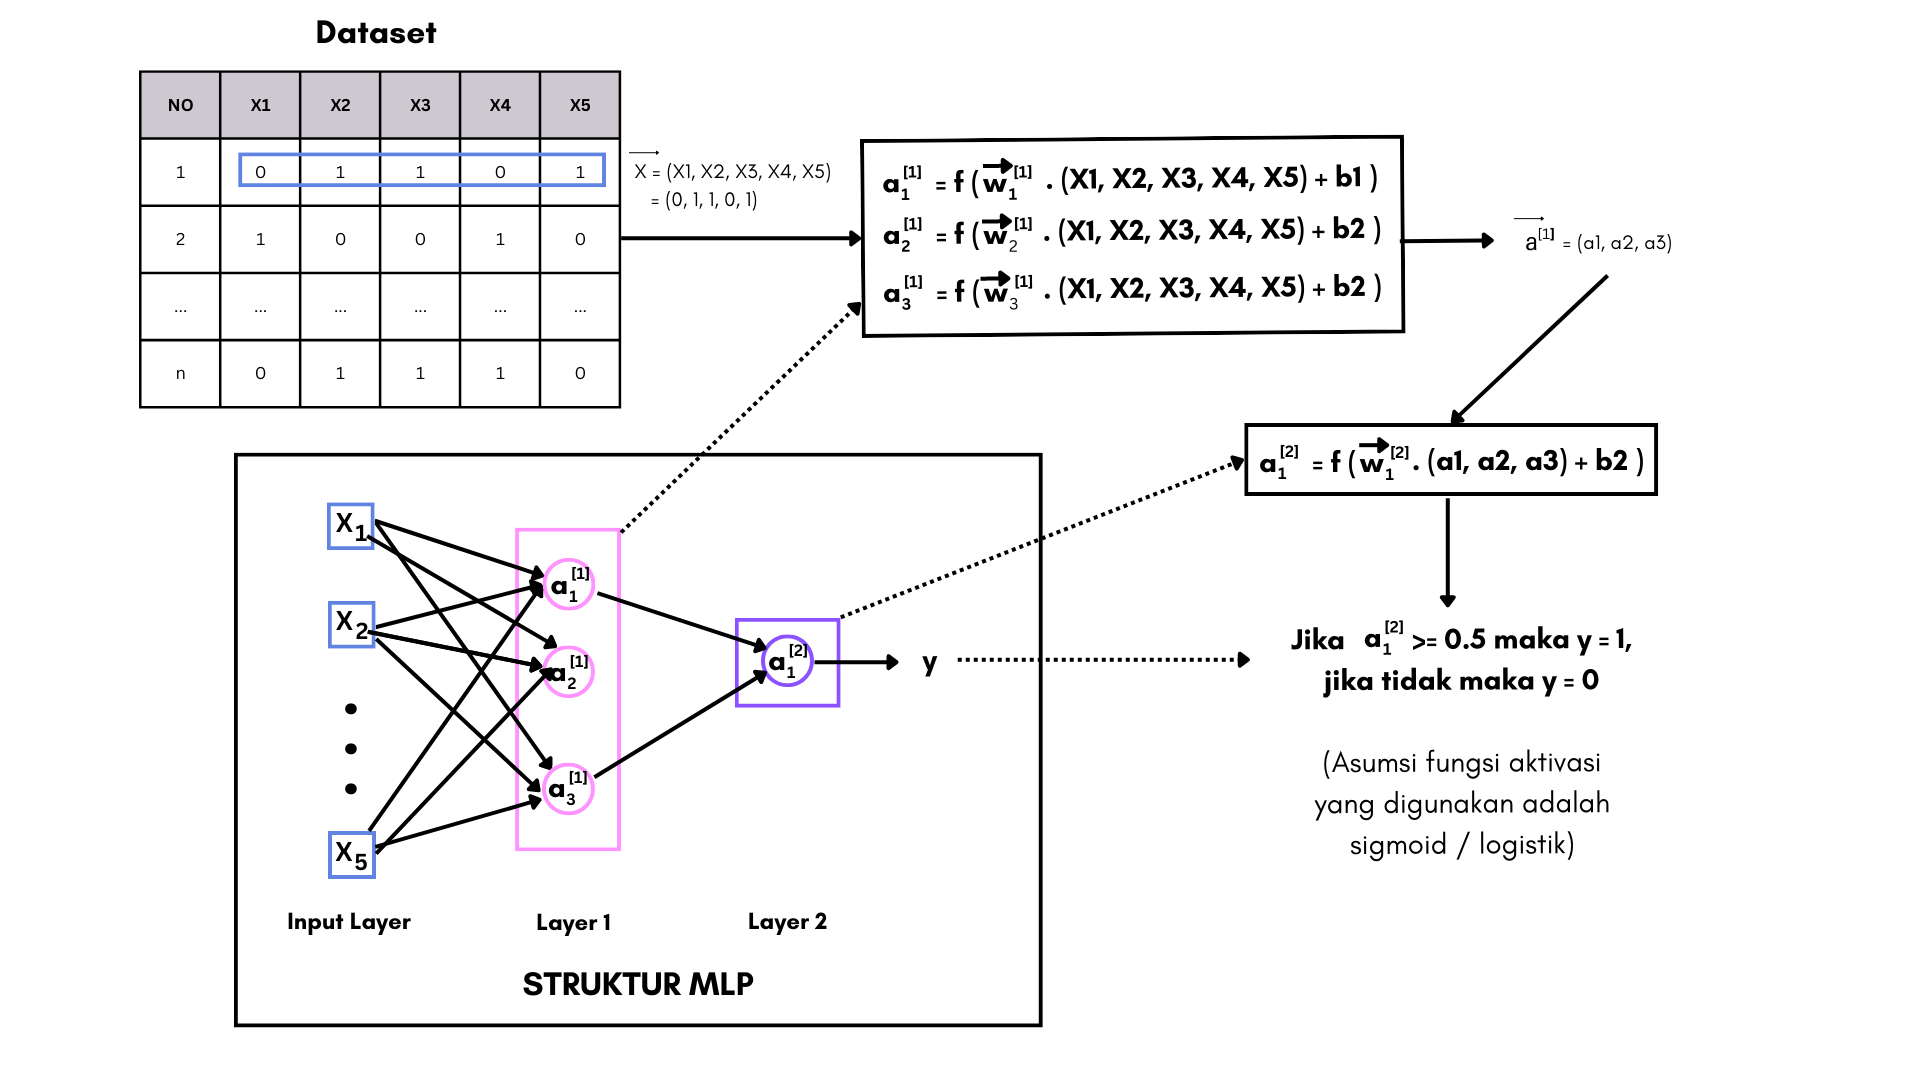

Struktur dasar MLP terdiri dari tiga jenis layer:
1. **Input Layer**: merupakan layer pertama yang memiliki jumlah neuron sesuai dengan jumlah fitur dalam dataset. Misalnya, jika terdapat lima fitur, maka input layer akan memiliki lima neuron.
2. **Hidden Layer**: merupakan layer yang terletak di antara input layer dan output layer. Layer ini berisi neuron-neuron komputasional yang menerima input dari layer sebelumnya, memprosesnya, dan mengirimkan hasilnya ke output layer atau hidden layer berikutnya. Pada gambar diatas, hanya terdapat 1 hidden layer yang digunakan, tetapi pada kenyataannya kita bisa menentukan jumlah dan size dari hidden layer yang kita inginkan sesuai kebutuhan kita.
3. **Output Layer**: merupakan layer terakhir yang menentukan hasil dari klasifikasi atau regresi. Pada kasus binary classification seperti gambar diatas, output layer biasanya hanya memiliki satu neuron dan jika menggunakan fungsi aktivasi sigmoid (logistik), maka output akan bernilai antara 0 hingga 1 dan akan ditentukan juga suatu threshold untuk menentukan class prediksi. Contohnya, jika hasil >= 0.5, maka output diklasifikasikan sebagai class 1, dan jika < 0.5, diklasifikasikan sebagai class 0.

Pada hidden layer, setiap neuron memiliki dua komponen utama:

1. **Weight (Bobot)**: merupakan parameter yang dikalikan dengan input dari layer sebelumnya. Weight ini menunjukkan "kekuatan" atau pengaruh masing-masing input pada neuron, yang mana nilainya akan ditentukan dan dioptimalkan selama proses training untuk meminimalkan loss function menggunakan algoritma tertentu, misalnya backpropagation.
2. **Bias**: merupakan sebuah konstanta tambahan yang digunakan untuk menyesuaikan output masing-masing neuron agar lebih sesuai dengan output yang diinginkan.

Neuron merupakan fungsi yang didefinisikan sebagai

![Neuron](https://i.imgur.com/ytS5Xf7.png)

dimana:
- vektor **x** = (x1, x2, ..., xn) merupakan input,
- vektor **w** = (w1, w2, ..., wn) disebut dengan bobot atau weights,
- konstanta *b* disebut dengan bias, dan
- fungsi *f* disebut dengan fungsi aktivasi. Ada banyak fungsi aktivasi yang dapat digunakan seperti pada gambar dibawah ini:

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Selanjutnya kita akan mencoba untuk membuat sebuah model MLPClassifier yang memiliki 2 hidden layer dimana masing-masing layer memiliki 30 dan 10 neuron berturut-turut. Selain itu, fungsi aktivasi yang digunakan adalah Rectified Linear Unit (ReLU).

In [93]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(30,10),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [94]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(mlp_classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9902
f1_macro score: 0.5165850675366084
precision_micro score: 0.9902


/Users/aldenluthfi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aldenluthfi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aldenluthfi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

precision_macro score: 0.6950990495247623
recall_micro score: 0.9902
recall_macro score: 0.51


F1 macro score yang didapat tidak terlalu bagus mungkin karena model MLP digunakan pada dataset yang imbalance. Oleh karena itu, kita akan mencoba melakukan teknik resampling seperti yang sudah dipelajari sebelumnya, tetapi sekarang kita akan menerapkan pipeline untuk menggabungkan proses resampling dan training tersebut

# Pipeline

Pipeline dalam konteks machine learning adalah serangkaian langkah yang diatur secara berurutan untuk memproses data dan membangun suatu model. Langkah pemrosesan data yang bisa dilakukan dalam pipeline misalnya adalah mengisi missing value menggunakan suatu imputer, normalisasi atau standarisasi fitur (contohnya menggunakan standardscaler), dan encoding, tetapi tidak terbatas pada contoh-contoh tersebut saja. Dengan pipeline, kita dapat mengotomatisasi alur kerja dan memastikan setiap step yang dilakukan menjadi konsisten dan dapat direproduksi.

![Pipeline](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*mEO_PWFmOG_POqpf.png)

*Sumber: [Scikit-learn Pipelines Explained: Streamline and Optimize Your Machine Learning Processes](https://medium.com/@sahin.samia/scikit-learn-pipelines-explained-streamline-and-optimize-your-machine-learning-processes-f17b1beb86a4)*

Dalam konteks imbalance classification, pipeline juga bisa digunakan untuk melakukan resampling pada dataset. Contoh berikutnya akan menunjukkan bagaimana kita dapat melakukan oversampling pada dataset dan kemudian membangun sebuah model MLPClassifier untuk menyelesaikan suatu problem classification menggunakan sebuah pipeline yang diimport dari `imblearn.pipeline`.

In [95]:
# Membuat pipeline
steps = [('over', SVMSMOTE(random_state=42)), ('model', mlp_classifier)]
pipeline = Pipeline(steps=steps)

In [96]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9586
f1_macro score: 0.6253439012973351
precision_micro score: 0.9586
precision_macro score: 0.5822116773282112
recall_micro score: 0.9586
recall_macro score: 0.8603030303030303


Bisa dilihat bahwa skor f1 macro nya berubah secara signifikan dari yang sebelumnya. Ini artinya proses oversampling berhasil dilakukan sebelum melakukan training pada model MLPClassifier, dan hasilnya lebih bagus daripada MLPClassifier yang digunakan pada dataset original.

# Soal

## Deskripsi Dataset

Dataset yang akan dipakai pada lab ini adalah dataset [Bank Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn) dengan sedikit modifikasi. Silahkan klik link tersebut untuk mengetahui penjelasan fitur-fiturnya.

Target variable pada dataset ini adalah `Exited`. Jumlah customer yang tidak meninggalkan bank (`Exited=0`) adalah 7962, sedangkan jumlah customer yang meninggalkan bank (`Exited=1`) adalah 159. Ini membuat dataset menjadi imbalance dan kalian akan mempraktikkan hal-hal yang sudah dipelajari di lab ini untuk menangani kasus imbalance tersebut.

In [97]:
df=pd.read_csv('Customer-Churn-Records-v2.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8121 entries, 0 to 8120
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8121 non-null   int64  
 1   Geography           8121 non-null   object 
 2   Gender              8121 non-null   object 
 3   Age                 8121 non-null   int64  
 4   Tenure              8121 non-null   int64  
 5   Balance             8121 non-null   float64
 6   NumOfProducts       8121 non-null   int64  
 7   HasCrCard           8121 non-null   int64  
 8   IsActiveMember      8121 non-null   int64  
 9   EstimatedSalary     8121 non-null   float64
 10  Exited              8121 non-null   int64  
 11  Complain            8121 non-null   int64  
 12  Satisfaction Score  8121 non-null   int64  
 13  Card Type           8121 non-null   object 
 14  Point Earned        8121 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 951.8

In [99]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,757,Germany,Female,34,9,101861.36,2,0,0,187011.96,0,0,5,PLATINUM,903
1,644,France,Male,33,8,0.00,2,1,1,155294.17,0,0,5,SILVER,813
2,655,Spain,Female,56,5,0.00,2,1,1,41782.70,0,0,2,PLATINUM,979
3,710,Spain,Female,36,8,0.00,2,0,0,83206.19,0,0,3,SILVER,636
4,684,Spain,Female,31,8,0.00,2,1,0,188637.05,0,0,4,SILVER,515


In [100]:
df['Exited'].value_counts()

Exited
0    7962
1     159
Name: count, dtype: int64

## 1. Imbalanced dataset

a) Buatlah sebuah dataset baru yang terdiri dari kolom `EstimatedSalary` dan kolom `Balance` sebagai fitur-fiturnya (X), dan kolom `Exited` sebagai target (y).

In [101]:
X = df[['EstimatedSalary', 'Balance']]
y = df['Exited']

b) Hitung jumlah masing-masing target (Hint: Counter).

In [102]:
Counter(y)

Counter({0: 7962, 1: 159})

c) Visualisasikan dataset pada soal (1a) dengan scatter plot. Berikan warna yang berbeda untuk setiap kelasnya

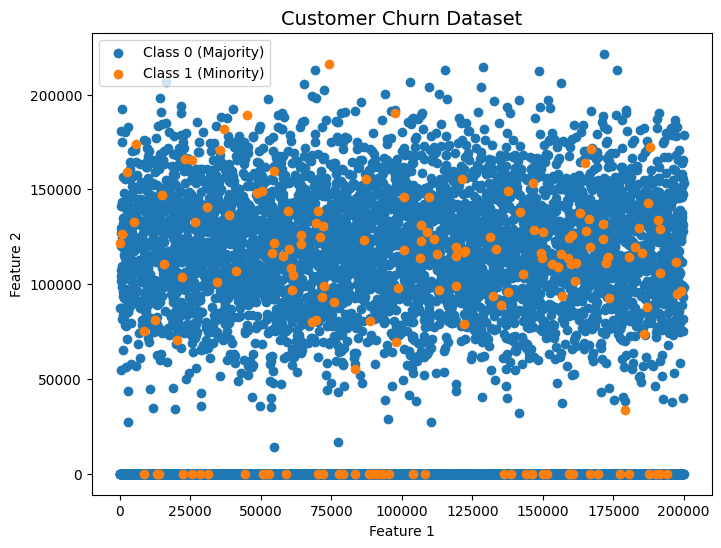

In [103]:
plot_single_dataset(X.to_numpy(), y.to_numpy(), "Customer Churn Dataset", figsize=(8, 6))

d) Lengkapilah fungsi di bawah ini untuk melakukan oversampling pada setiap fold ketika melakukan cross validation pada suatu model menggunakan StratifiedKFold dengan k=5, shuffle=True, dan random_state=42. Tampilkan juga rata-rata skor accuracy, f1 macro, precision macro, dan recall macro.

Jalankan fungsi tersebut dengan menggunakan:
- DecisionTreeClassifier, dengan random_state=42
- Teknik oversampling RandomOversampler, dengan random_state=42
- X dan y yang didefinisikan pada soal (1a)

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [104]:
def train_and_evaluate_with_oversampling(model, X, y, resample_method):
    # Gunakan StratifiedK-fold biasa (Ubah None menjadi jawaban)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Simpan hasil skor metrik setiap iterasi pada sebuah list
    accuracies = []
    f1_scores = []
    precisions = []
    recalls = []

    # Iterasi untuk membagi fold mana yang menjadi training dan validation test dataset
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]


        # Lakukan fit resample dari menggunakan variabel resample_method di parameter method ini (Ubah None menjadi jawaban)
        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        model_clone = clone(model) # Cloning model untuk membuat model harus dilatih lagi untuk memprediksi di luar method ini

        # Lakukan fitting model dari hasil clone model dengan X dan y dataset yang sudah diresample
        model_clone.fit(X_train_sampled, y_train_sampled)

        # Prediksi kelas kategori menggunakan model yang telah dilatih di atas dengan menggunakan validation test dataset (Ubah None menjadi jawaban)
        y_pred = model_clone.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        # Tambahkan hasil skor metrik ke dalam list yang bersesuaian
        accuracies.append(accuracy)
        f1_scores.append(f1)
        precisions.append(precision)
        recalls.append(recall)


    # Hitung dan tampilkan mean dari setiap list skor metrik
    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {np.mean(accuracies)}')
    print(f'Mean F1-score (macro): {np.mean(f1_scores)}')
    print(f'Mean Precision (macro): {np.mean(precisions)}')
    print(f'Mean Recall (macro): {np.mean(recalls)}')

model = DecisionTreeClassifier(random_state=42)
resample_method = RandomOverSampler(random_state=42)

train_and_evaluate_with_oversampling(model, X.values, y.values, resample_method)

Mean scores across all folds:
Mean Accuracy: 0.9635509662751043
Mean F1-score (macro): 0.4976120916265085
Mean Precision (macro): 0.497570140331623
Mean Recall (macro): 0.49772234982701613


e) Jalankan kode di bawah ini. Apakah terdapat perbedaan skor dengan yang ada pada soal (1d)? Jika berbeda, mengapa hal tersebut bisa terjadi, dan approach manakah yang lebih tepat untuk dilakukan (approach (1d) atau (1e))?

In [105]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_oversampled, y_oversampled = RandomOverSampler(random_state=42).fit_resample(X, y)

scoring = ['accuracy','f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(DecisionTreeClassifier(random_state=42), X_oversampled, y_oversampled, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9889476030071865
f1_macro score: 0.9889460502661436
precision_macro score: 0.9891971322065523
recall_macro score: 0.9889470500651404


Diantara kedua pendekatan yang digunakan dalam nomor (1d) dan (1e). Pendekatan yang lebih baik digunakan adalah pendekatan (1d) karena walaupun (1e) memiliki skor metrik lebih tinggi, pendekatan (1d) diharapkan dapat memberikan perdiksi yang lebih baik untuk generalisasi. Hasil perbedaan skor metrik ini disebabkan pada metode (1d) data validasi tidak memiliki data sintesis. Metode ini menerapkan best practice dalam machine learning yaitu adanya pemisahan data validasi dan data training. Oleh karena hal ini, seluruh data yang dioversample pada (1e) memberikan skor metrik yang terlalu optimis.

f) Mengapa StratifiedKFold umumnya lebih sering digunakan dalam kasus Imbalanced dataset dibandingkan KFold biasa? Jelaskan serta berikan sumber referensi anda.

Stratified K-Fold lebih sering digunakan dalam kasus Imbalanced dataset dibandingkan KFold biasa karena Stratified K-Fold memastikan bahwa setiap fold memiliki proporsi kelas yang sama dengan proporsi kelas pada keseluruhan dataset. Hal ini sangat penting untuk dilakukan pada kasus Imbalanced dataset agar model yang dihasilkan lebih baik dalam memprediksi kelas minoritas. Dalam konteks klasifikasi pastinya kita mau setiap testing data juga memiliki sifat balanced seperti yang sudah dijelaskan pada lab ini.

**Referensi**:
- https://stackoverflow.com/questions/65318931/stratifiedkfold-vs-kfold-in-scikit-learn

## 2. Oversampling

a) Terapkan metode oversampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

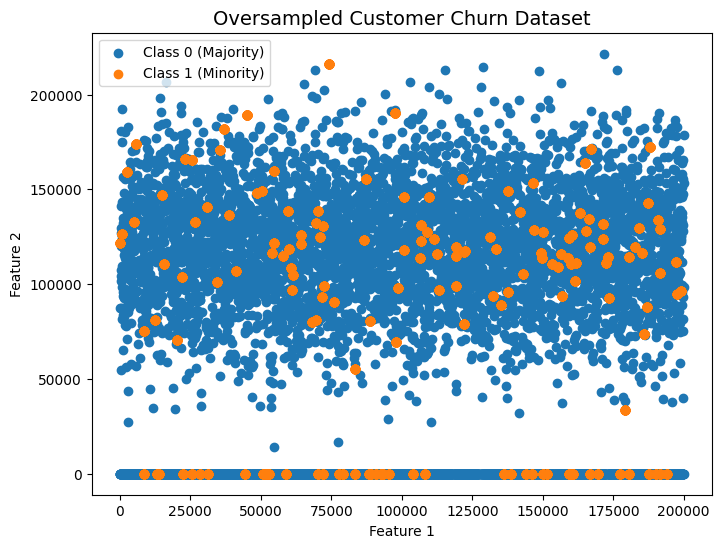

In [106]:
oversampler = RandomOverSampler(random_state=42)

X_over, y_over = oversampler.fit_resample(X, y)

plot_single_dataset(X_over.to_numpy(), y_over.to_numpy(), "Oversampled Customer Churn Dataset", figsize=(8, 6))

b) Terapkan metode oversampling yang lain yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

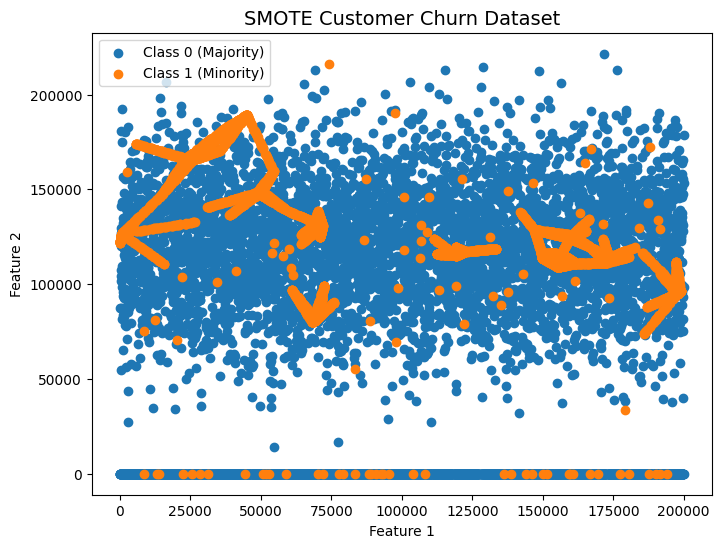

In [107]:
oversampler = BorderlineSMOTE(random_state=42)

X_smote, y_smote = oversampler.fit_resample(X, y)

plot_single_dataset(X_smote.to_numpy(), y_smote.to_numpy(), "SMOTE Customer Churn Dataset", figsize=(8, 6))

c) Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode oversampling yang Anda pilih? Jika ada, jelaskan mengapa perbedaan tersebut bisa terjadi! Sertakan sumber referensi anda

Terdapat perbedaan yang jelas terlihat pada grafik scatter plot hasil resampling dari kedua metode oversampling yang digunakan. Pada metode SMOTE, data yang dihasilkan lebih tersebar dan lebih banyak dibandingkan dengan metode Random Oversampling. Hal ini disebabkan karena SMOTE melakukan pembuatan data sintetis dengan cara menghubungkan titik-titik data yang ada dengan garis lurus. Oleh karena itu, data yang dihasilkan akan lebih tersebar dan lebih banyak. Sementara itu, Random Oversampling hanya melakukan duplikasi data yang ada sehingga data yang dihasilkan tidak terlalu banyak dan tidak terlalu tersebar. pada random sampling, tidak ada informasi baru yang ditambahkan, hal ini menyebabkan overfitting. Sedangkan pada SMOTE, penambahan data sintesis meningkatkan varietas pada kelas minoritas.

**Referensi**
- https://collinloo.medium.com/quick-comparison-between-random-oversampling-and-smote-4b6c433d7e7d
- https://www.quora.com/Whats-the-difference-between-random-oversampling-and-oversampling-using-SMOTE-on-an-imbalanced-dataset-Is-the-later-always-better-then-the-first

d) Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menggunakan metode oversampling yang dipakai pada (2a)
- Model kedua menggunakan metode oversampling yang dipakai pada (2b)
- Metrik utama yang digunakan adalah f1 macro.
- Oversampling dilakukan pada setiap fold cross validation

Petunjuk: Kalian bisa menggunakan cara 1d untuk menjawab soal ini.

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [108]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

prand = Pipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

psmote = Pipeline([
    ('oversampler', BorderlineSMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

oof_pred1 = cross_val_predict(prand, X, y, cv=skf)
oof_pred2 = cross_val_predict(psmote, X, y, cv=skf)

print("Random Oversampling:")
print(f'f1-score (macro): {f1_score(y, oof_pred1, average="macro")}')

print("BorderlineSMOTE:")
print(f'f1-score (macro): {f1_score(y, oof_pred2, average="macro")}')

Random Oversampling:
f1-score (macro): 0.49738301342366076
BorderlineSMOTE:
f1-score (macro): 0.49698181203896613


e) Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

RandomOverSampling memberikan skor metrik f1 lebih tinggi, walaupun tidak terlalu jauh perbedaannya daripada SMOTE. Kedua skor metode juga menunjukkan performa model yang buruk sehingga kata "lebih baik" tidak cocok untuk menggambarkan konteks kedua model. Seperti yang sidah dijelaskan di nomor (2c) kedua metode menggunakan pendekatan yang berbeda untuk mengatasi ketimpangan data, sehingga tentu akan ada perbedaan dari model yang dihasilkan. Meskipun demikian, kedua metode tersebut tidak memberikan hasil yang baik, sehingga perlu dilakukan penelitian dan pendekatan metode lain yang lebih lanjut untuk meningkatkan performa model. (jawaban informal: ya intinya sama sama buruk performa modelnya jadi tidak bisa disimpulkan mana metode yang lebih baik)

## 3. Undersampling

a) Terapkan metode undersampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

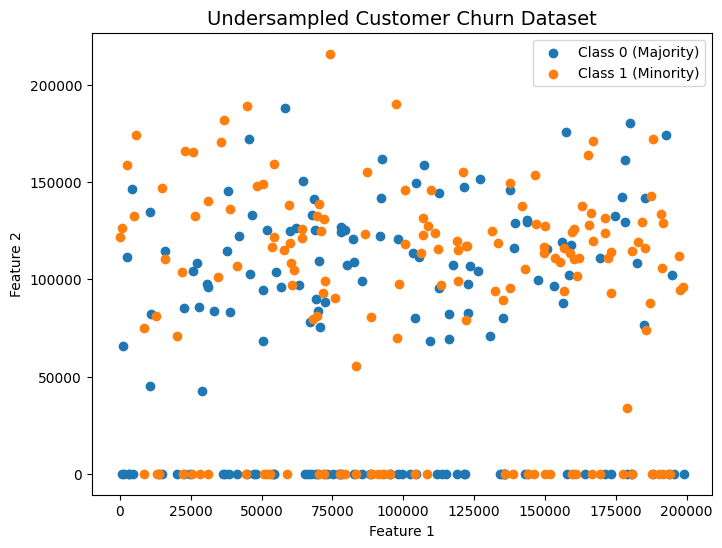

In [109]:
X_under, y_under = RandomUnderSampler(random_state=42).fit_resample(X, y)

plot_single_dataset(X_under.to_numpy(), y_under.to_numpy(), "Undersampled Customer Churn Dataset", figsize=(8, 6))

b) Terapkan metode undersampling yang lain yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

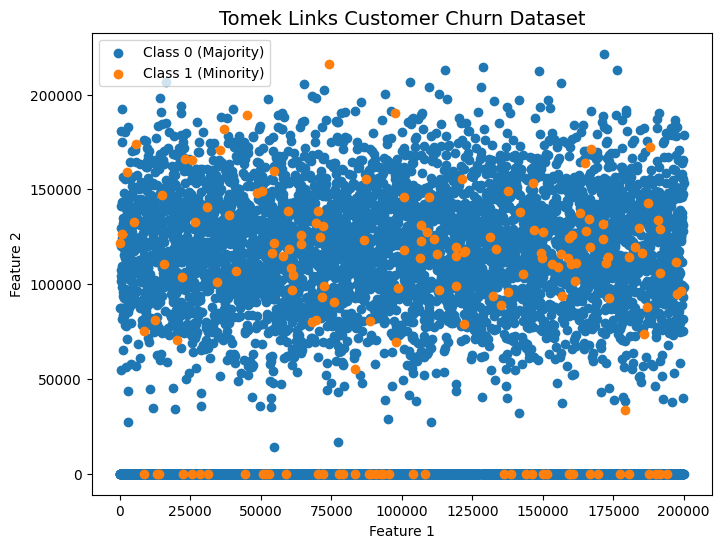

In [110]:
X_tomek, y_tomek = TomekLinks().fit_resample(X, y)

plot_single_dataset(X_tomek.to_numpy(), y_tomek.to_numpy(), "Tomek Links Customer Churn Dataset", figsize=(8, 6))

c) Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (3a) dan (3b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi! Jangan lupa sertakan sumber referensi anda

terlihat perbedaan jelas antara kedua metode yang digunakan. Metode RandomUnderSampling menjamin penghapusan dari kelas minoritas sehingga menyeimbangkan data. Sedangkan pada metode TomekLinks, terdapat syarat yang harus dipenuhi agar data dihapus, yaitu data dari kelas mayoritas yang memiliki kesamaan terlalu mirip dengan data dari kelas minoritas. Namun pada kasus ini tidak banyak data yang memenuhi syarat tersebut sehingga tidak banyak data yang dihapus. Oleh karena itu, data yang dihasilkan oleh TomekLinks tidak terlalu berbeda dengan data asli.

**Referensi**:
- https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
- https://medium.com/@mahmoudadel200215/tomek-links-948ea097199e

d) Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menerima dataset pada soal (3a)
- Model kedua menerima dataset pada soal (3b)
- Metrik utama yang digunakan adalah f1 macro.

In [111]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

prand = Pipeline([
    ('oversampler', RandomUnderSampler(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

psmote = Pipeline([
    ('oversampler', TomekLinks()),
    ('model', DecisionTreeClassifier(random_state=42))
])

oof_pred1 = cross_val_predict(prand, X, y, cv=skf)
oof_pred2 = cross_val_predict(psmote, X, y, cv=skf)

print("Random Undersampling:")
print(f'f1-score (macro): {f1_score(y, oof_pred1, average="macro")}')

print("TomekLinks:")
print(f'f1-score (macro): {f1_score(y, oof_pred2, average="macro")}')

Random Undersampling:
f1-score (macro): 0.3500349797213949
TomekLinks:
f1-score (macro): 0.4955160676115033


e) Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

Metode TomekLinks menghasilkan model yang memiliki skor metrik yang lebih tinggi dari RandomUnderSampling. Hal ini disebabkan syarat yang harus dipenuhi oleh data yang akan dihapus pada TomekLinks. Data yang dihapus pada TomekLinks adalah data yang memiliki kesamaan terlalu mirip dengan data dari kelas minoritas. Oleh karena itu, data yang dihapus pada TomekLinks lebih selektif sehingga data yang dihasilkan lebih baik daripada RandomUnderSampling. Sehingga model lebih mudah untuk membedakan data mana yang termasuk kelas minoritas dan kelas mayoritas. Meskipun demikian, seperti pada nomor (3e) kedua metode tersebut tidak memberikan hasil yang baik, sehingga perlu dilakukan penelitian dan pendekatan metode lain yang lebih lanjut untuk meningkatkan performa model.

## 4. Cost-Sensitive Learning

a) Buatlah beberapa model decision tree dengan random_state=42 yang menerima dataset soal (1a) dan dengan weight yang berbeda, yaiu:
- tanpa weights
- weights = {0: 1, 1: 2}
- weights = {0: 1, 1: 99}

Lakukan train_test_split dengan ketentuan berikut:
- menggunakan X dan y dari soal (1a)
- stratify=y
- random_state=42
- test_size=0.2

Kemudian, lakukan fit predict pada model dengan weights yang berbeda, kemudian tampilkan skor f1 macro dan juga confusion matrix untuk masing-masing model DT dengan weights yang berbeda tersebut. Confusion matrix yang tidak diberi label akan mendapat pengurangan nilai

No Weight f1: 0.49059561128526646


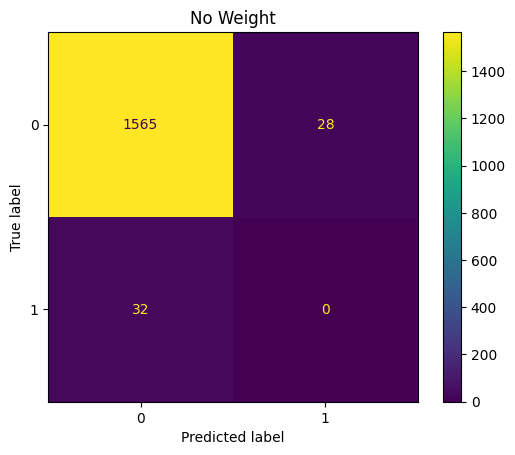

Weight A f1: 0.49011609664261063


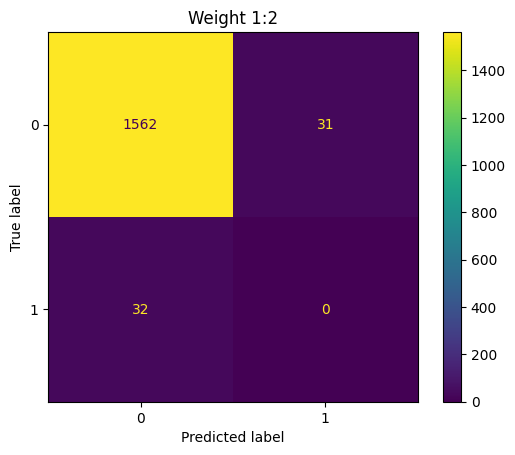

Weight B f1: 0.48947533773169966


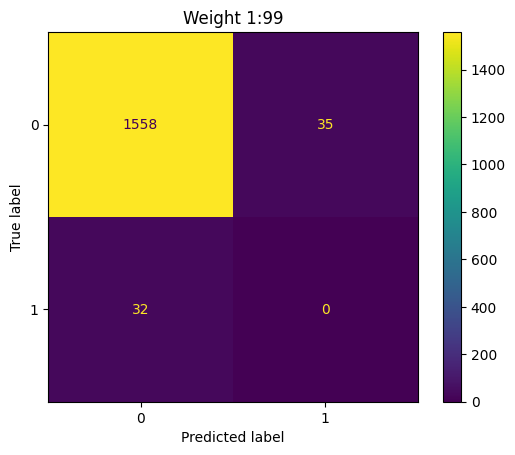

In [112]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

no_weight = DecisionTreeClassifier(random_state=42)
weight_a = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 2})
weight_b = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 99})

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# NO WEIGHT
no_weight.fit(X_train, y_train)
y_pred = no_weight.predict(X_test)

print(f"No Weight f1: {f1_score(y_test, y_pred, average='macro')}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("No Weight")
plt.show()

# WEIGHT A
weight_a.fit(X_train, y_train)
y_pred = weight_a.predict(X_test)

print(f"Weight A f1: {f1_score(y_test, y_pred, average='macro')}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Weight 1:2")
plt.show()


# WEIGHT B
weight_b.fit(X_train, y_train)
y_pred = weight_b.predict(X_test)

print(f"Weight B f1: {f1_score(y_test, y_pred, average='macro')}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Weight 1:99")
plt.show()

b) Berdasarkan jawaban pada soal (4a), Apakah terdapat perbedaan pada confusion matrix dan score f1 macro masing-masing weights? Jelaskan.

Terdapat sedikit perbedaan antara skor metrik f1 makro dari masing-masing weights. Meskipn demikian perbedaan ini tidak terlalu berarti. terlihat bahwa True Negative mendominasi prediksi pada ketiga model karena ketidakseimbangan kelas mayoritas. patut dicatat juga bahwa model tidak sama sekali pernah berhasil memprediksi kelas (1). weight yang diterapkan pada data belum cukup untuk mengatasi ketidakseimbangan kelas pada data.

## 5. Neural Network dan Pipeline

a) Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 40, dan 20 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [113]:
model_a = MLPClassifier(hidden_layer_sizes=(50, 40, 20), random_state=42)

b) Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 80 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [114]:
model_b = MLPClassifier(hidden_layer_sizes=(100, 80), random_state=42)

c) Lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 terhadap kedua model MLP pada soal (5a) dan (5b) memakai X dan y yang didefinisikan pada soal (1a). Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [115]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pred_a = cross_val_predict(model_a, X, y, cv=skf, n_jobs=-1)
pred_b = cross_val_predict(model_b, X, y, cv=skf, n_jobs=-1)

f1_macro_a = f1_score(y, pred_a, average="macro")
f1_micro_a = f1_score(y, pred_a, average="micro")

f1_macro_b = f1_score(y, pred_b, average="macro")
f1_micro_b = f1_score(y, pred_b, average="micro")

print(f"Model A")
print(f"f1 Macro: {f1_macro_a}")
print(f"f1 Micro: {f1_micro_a}")

print(f"Model B")
print(f"f1 Macro: {f1_macro_b}")
print(f"f1 Micro: {f1_micro_b}")

Model A
f1 Macro: 0.49427003865782687
f1 Micro: 0.9309198374584411
Model B
f1 Macro: 0.5089874244737598
f1 Micro: 0.9619504987070557


d) Apakah terdapat perbedaan skor metrik makro evaluasi model pada soal (5c)? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!

Pada skor makro model B lebih tinggi dari pada model A. hal ini bisa disebabkan hyperparameter pada model B yang memiliki lebih banyak neuron meskipun hanya 2 layer sehingga model B lebih baik dalam mempelajari pola pada data. Namun, perbedaan skor metrik ini tidak terlalu signifikan sehingga kedua model tersebut memiliki performa yang hampir sama. Sebaliknya model A memiliki lebih banyak layer namun memiliki jumlah neuron yang lebih sedikit sehingga model A bisa jadi tidak mampu mempelajari pola pada data dengan lebih baik dari model B.


e) Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu oversampling menggunakan SMOTE dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [116]:
pipeline_b = Pipeline([
    ('oversampler', SMOTE(random_state=42)),
    ('model', model_b)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pred_b = cross_val_predict(pipeline_b, X, y, cv=skf, n_jobs=-1)

f1_macro_b = f1_score(y, pred_b, average="macro")
f1_micro_b = f1_score(y, pred_b, average="micro")

print(f"Model B with SMOTE")
print(f"f1 Macro: {f1_macro_b}")
print(f"f1 Micro: {f1_micro_b}")

Model B with SMOTE
f1 Macro: 0.3507340994280952
f1 Micro: 0.4993227435044945


f) Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu undersampling menggunakan RandomUnderSampler dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [117]:
pipeline_b = Pipeline([
    ('oversampler', RandomUnderSampler(random_state=42)),
    ('model', model_b)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pred_b = cross_val_predict(pipeline_b, X, y, cv=skf, n_jobs=-1)

f1_macro_b = f1_score(y, pred_b, average="macro")
f1_micro_b = f1_score(y, pred_b, average="micro")

print(f"Model B with RandomUnderSampler")
print(f"f1 Macro: {f1_macro_b}")
print(f"f1 Micro: {f1_micro_b}")

Model B with RandomUnderSampler
f1 Macro: 0.3561329974163578
f1 Micro: 0.5150843492180766


## 6. Soal Teoritis Neural Network

a) Apabila dalam binary classification dibutuhkan 1 neuron dalam output layer, berapa neuron yang dibutuhkan dalam output layer untuk multiclass classification? Berikan contoh dan sertakan sumber referensi yang kalian gunakan.

pada klasifikasi biner hanya dibutuhkan satu neuron karena hanya ada dua kemungkinan kelas yang dapat diklasifikasikan. klasifikasi ini menggunakan fungsi sigmoid yang menentukan probabilitas kelas (jawaban informal: intinya kalau biner itu kelas A probabilitasnya p, maka kelas B probabilitasnya 1-p). Sedangkan pada multiclass classification, dibutuhkan neuron sebanyak jumlah kelas yang ada. Hal ini disebabkan oleh fungsi aktivasi softmax yang digunakan pada output layer. Softmax menghitung probabilitas dari masing-masing kelas yang ada pada dataset. (Sehingga, masing-masing kelas akan dipetakan terhadap probabilitas [0..1])

**Referensi**:
- https://www.atmosera.com/blog/multiclass-classification-with-neural-networks/#:~:text=If%20the%20dataset%20contains%20four,than%20the%20sigmoid%20activation%20function.

b) Diketahui terdapat hyperparameter berikut pada MLPClassifier:
- hidden_layer_sizes
- learning_rate_init

Untuk masing-masing hyperparameter tersebut, jelaskan apa yang akan terjadi jika kita menetapkan value yang berbeda (misalnya menjelaskan perbedaan hidden_layer_size=(50,50) vs (100,50), dsb.). Asumsikan hyperparameter learning_rate yang dipakai adalah constant.

Sertakan sumber referensi anda.

##### Hidden Layer Sizes

hyperparameter ini menentukan jumlah hidden layer, terutama jumlah neuron pada setiap layer. Tentunya jaringan yang memiliki lebih banyak neuron akan membutuhkan lebih banyak waktu untuk training. Jumlah neuron yang lebih banyak juga bisa membuat model lebih berkapasitas untuk memahami data yang kompleks. namun jumlah neuron yang terlalu banyak juga bisa menyebabkan overfitting. Jumlah neuron yang lebih sedikit juga bisa menyebabkan underfitting. Oleh karena itu, jumlah neuron yang digunakan harus disesuaikan dengan kompleksitas data yang ada.

Contohnya hidden_layer_size=(50,50) vs (100,50). pada (100, 50) jumlah neuron yang lebih banyak pada layer pertama akan membuat model lebih berkapasitas untuk memahami data masukan yang kompleks. dan jumlah neuron yang lebih kecil pada layer kedua akan membantu model untuk memperinci pemodelannya. Namun, jumlah neuron yang lebih sedikit pada layer kedua juga bisa menyebabkan underfitting.

##### Learning Rate Init

learning rate init adalah hyperparameter yang menentukan seberapa besar langkah yang diambil oleh model ketika melakukan optimisasi. Jika learning rate terlalu besar, model akan cenderung tidak stabil dan overshooting. Sebaliknya, jika learning rate terlalu kecil, model akan cenderung konvergen terlalu lambat. Oleh karena itu, learning rate harus disesuaikan dengan kompleksitas data yang ada.

**Referensi**:
- https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning
- https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html

# Kaggle Competition

Dalam rangka menerapkan pemahaman kalian pada materi imbalance classification dan neural network, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 7 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Imbalance Classification Dan Neural Network](https://www.kaggle.com/t/115afa106235464aa16e5614877bd90d)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

df_train = pd.read_csv('credit_approval_train.csv')
df_test = pd.read_csv('credit_approval_test.csv')
display(df_test)

X = df_train.select_dtypes(['number']).drop(columns=['Status'])
y = df_train['Status']
display(X)

selector_ti = SelectKBest(f_classif, k=4)
X_train = selector_ti.fit_transform(X, y)
display(X_train)

columns = selector_ti.get_support(indices=True)
display(columns)

X_test = df_test.select_dtypes(['number']).iloc[:, columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_scaled, y)

y_test_pred = mlp.predict(X_test_scaled)

X_train

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,22767,M,0,0,0,180000,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,1,0,0,0,Laborers ...,2,48,10,0,14
1,5347,F,0,1,2,112500,Working ...,Higher education ...,Married ...,House / apartment ...,1,1,1,1,Core staff ...,4,41,6,0,15
2,23596,F,0,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,3,35,16,0,53
3,22764,M,0,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,1,0,0,Laborers ...,3,34,7,0,15
4,3378,F,0,1,1,315000,State servant ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,1,0,0,1,Core staff ...,3,31,7,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,24587,F,0,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Sales staff ...,2,48,3,0,9
3766,262,F,0,1,0,103500,State servant ...,Secondary / secondary special ...,Widow ...,House / apartment ...,1,0,1,0,Core staff ...,1,49,24,0,14
3767,19294,M,0,1,0,180000,Commercial associate ...,Higher education ...,Single / not married ...,House / apartment ...,1,0,0,0,Core staff ...,1,28,1,0,11
3768,15840,F,0,1,0,157500,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,2,42,13,0,9


,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,12196,0,0,0,135000,1,1,0,0,1,54,6,0,25
1,949,0,1,1,180000,1,0,1,1,3,40,3,0,25
2,5138,1,1,1,292500,1,1,0,0,3,51,15,0,1
3,23074,0,0,0,90000,1,0,0,0,2,52,26,0,13
4,20390,0,1,1,103500,1,1,1,0,3,35,4,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21353,7369,0,1,2,157500,1,0,1,0,4,33,11,0,12
21354,2592,1,1,0,176400,1,1,1,0,2,27,1,0,4
21355,12817,0,1,2,180000,1,1,1,0,4,30,5,0,23
21356,6284,1,1,0,315000,1,0,0,1,1,36,10,0,9


/Users/aldenluthfi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aldenluthfi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([[54,  6,  0, 25],
       [40,  3,  0, 25],
       [51, 15,  0,  1],
       ...,
       [30,  5,  0, 23],
       [36, 10,  0,  9],
       [32,  3,  0, 14]])

array([10, 11, 12, 13])

/Users/aldenluthfi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
df_submit = pd.DataFrame({
    'Applicant_ID':df_test['Applicant_ID'],
    'Status':y_test_pred
})

df_submit.to_csv('submissiontry.csv', index=False)